In [1]:
import visa 
import numpy as np
import serial
import time
import os
import math
import h5py
import matplotlib.pyplot as plt
import csv
from utils import *
from pathlib import Path
path = os.getcwd()
path = Path(path)
print(Path(str(path.parent) + '\\Classes\\') )

import sys
sys.path.append(str(path.parent) + '\\Classes\\')
from SMA100B import *
from vna import *
%load_ext autoreload
%autoreload 2

C:\Users\oper\Desktop\labparamp\Env\paramp\lib\site-packages\visa.py:13: FutureWarning: The visa module provided by PyVISA is being deprecated. You can replace `import visa` by `import pyvisa as visa` to achieve the same effect.

The reason for the deprecation is the possible conflict with the visa package provided by the https://github.com/visa-sdk/visa-python which can result in hard to debug situations.
  warnings.warn(


SyntaxError: invalid syntax (utils.py, line 28)

In [ ]:
spectra = get_hdf5('scan_picco.hdf5', 'spectra')
f = get_hdf5('scan.hdf5', 'freq')


In [10]:
n_points = f.size
N_f = 2350
N_p = 8

In [11]:
mappa = np.empty((N_f, N_p))
G = np.empty((N_f, N_p))
d = np.empty(n_points)
for j in range(0, N_p):   
    for k in range(0, N_f):
        for i in range(0, n_points):
            d[i] = spectra[k][i][j]
        G[k][j], bw, start = band_info(f,d)
G_mean = np.mean(G)
G_sigma = np.std(G)
for j in range(0, N_p):   
    for k in range(0, N_f):
        if G_sigma == 0:
            mappa[k][j] = 0
        else:
            mappa[k][j] = (G[k][j] - G_mean)/G_sigma

In [12]:
storage_hdf5('scan_picco.hdf5', mappa, 'mappa')

In [13]:
storage_hdf5('scan_picco.hdf5', G, 'gain')

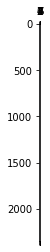

In [24]:
fig, ax = plt.subplots()

ax.matshow(mappa, cmap=plt.cm.Blues)
#fig.savefig('mappa.png')

In [17]:
p0 = -20
p1 = -18 #19
dp = 0.25
N_p = math.floor((p1-p0)/dp)


#pump frequency
f0 = 16612500000.0
f1 = 16730000000.0
df = 50e3
N_f = math.floor((f1-f0)/df)

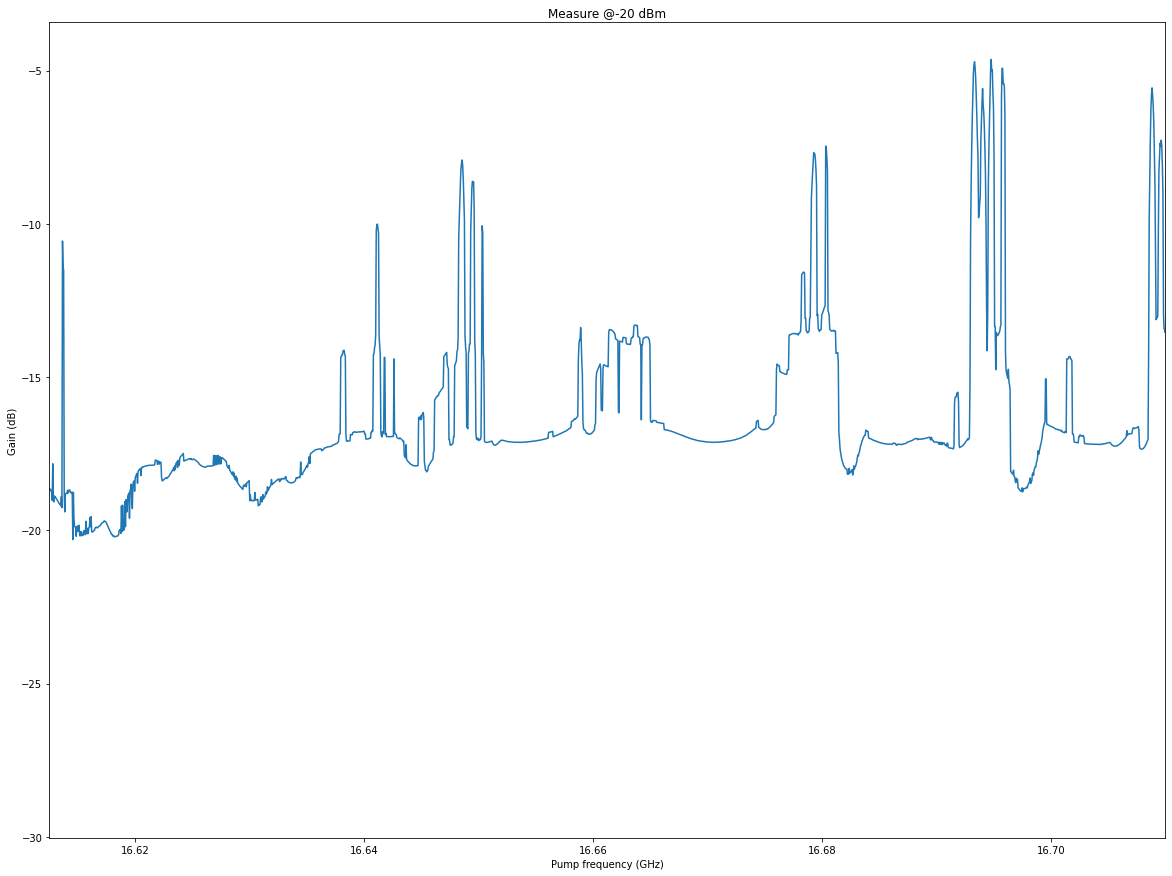

In [45]:
plt.figure(figsize=(20,15))
pump_fr = np.linspace(f0, f0+N_f*df,N_f)/1e9
plt.xlim(16612500000.0/1e9, 16.71)
plt.plot(pump_fr, G[:,0])
plt.xlabel('Pump frequency (GHz)')
plt.ylabel('Gain (dB)')
plt.title('Measure @-20 dBm')

plt.show()



In [26]:
max_f = 0
min_f = N_f
max_p = 0
min_p = N_p
for j in range(0, N_p):   
    for k in range(0, N_f):
        if mappa[k][j] > 3.1:
            if k >= max_f:
                max_f = k
            if k <= min_f:
                min_f = k
            if j >= max_p:
                max_p = j
            if j <= min_p:
                min_p = j
print(max_f, min_f, max_p, min_p)

1985 23 0 0


In [170]:
(f0 + 3558*df)/1e9

16.6779

In [171]:
p0 + 13*dp

-19

(-1.0, 4.0)

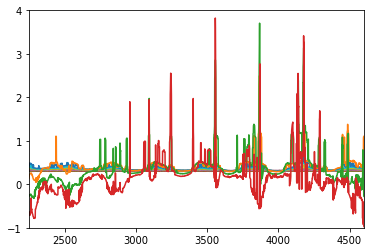

In [192]:

plt.plot(mappa)
plt.xlim(2250, 4600)
plt.ylim(-1,4)

In [193]:
print(f0+2250*df, f0+4600*df)

16612500000.0 16730000000.0


In [33]:
storage_hdf5('scan_picco.hdf5', [df], 'df')